## Data visualizations on the Iris dataset

We'll use three libraries for this tutorial: [pandas](http://pandas.pydata.org/), [matplotlib](http://matplotlib.org/), and [seaborn](http://stanford.edu/~mwaskom/software/seaborn/).

In [48]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
# default figuresize for most plots
plt.figure(figsize=(15,10))
%matplotlib inline
sns.set(style="white", color_codes=True)

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                    names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head(20)
# Press shift+enter to execute this cell

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0             5.1           3.5            1.4           0.2  Iris-setosa
1             4.9           3.0            1.4           0.2  Iris-setosa
2             4.7           3.2            1.3           0.2  Iris-setosa
3             4.6           3.1            1.5           0.2  Iris-setosa
4             5.0           3.6            1.4           0.2  Iris-setosa
5             5.4           3.9            1.7           0.4  Iris-setosa
6             4.6           3.4            1.4           0.3  Iris-setosa
7             5.0           3.4            1.5           0.2  Iris-setosa
8             4.4           2.9            1.4           0.2  Iris-setosa
9             4.9           3.1            1.5           0.1  Iris-setosa
10            5.4           3.7            1.5           0.2  Iris-setosa
11            4.8           3.4            1.6           0.2  Iris-setosa
12            4.8           3.0            1.4           0.1  Iris-setosa
13            4.3           3.0            1.1           0.1  Iris-setosa
14            5.8           4.0            1.2           0.2  Iris-setosa
15            5.7           4.4            1.5           0.4  Iris-setosa
16            5.4           3.9            1.3           0.4  Iris-setosa
17            5.1           3.5            1.4           0.3  Iris-setosa
18            5.7           3.8            1.7           0.3  Iris-setosa
19            5.1           3.8            1.5           0.3  Iris-setosa

In [33]:
# Let's see how many examples we have of each species
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [34]:
iris.describe(include='all').T

count unique          top freq     mean       std  min  25%  \
SepalLengthCm   150    NaN          NaN  NaN  5.84333  0.828066  4.3  5.1   
SepalWidthCm    150    NaN          NaN  NaN    3.054  0.433594    2  2.8   
PetalLengthCm   150    NaN          NaN  NaN  3.75867   1.76442    1  1.6   
PetalWidthCm    150    NaN          NaN  NaN  1.19867  0.763161  0.1  0.3   
Species         150      3  Iris-setosa   50      NaN       NaN  NaN  NaN   

                50%  75%  max  
SepalLengthCm   5.8  6.4  7.9  
SepalWidthCm      3  3.3  4.4  
PetalLengthCm  4.35  5.1  6.9  
PetalWidthCm    1.3  1.8  2.5  
Species         NaN  NaN  NaN

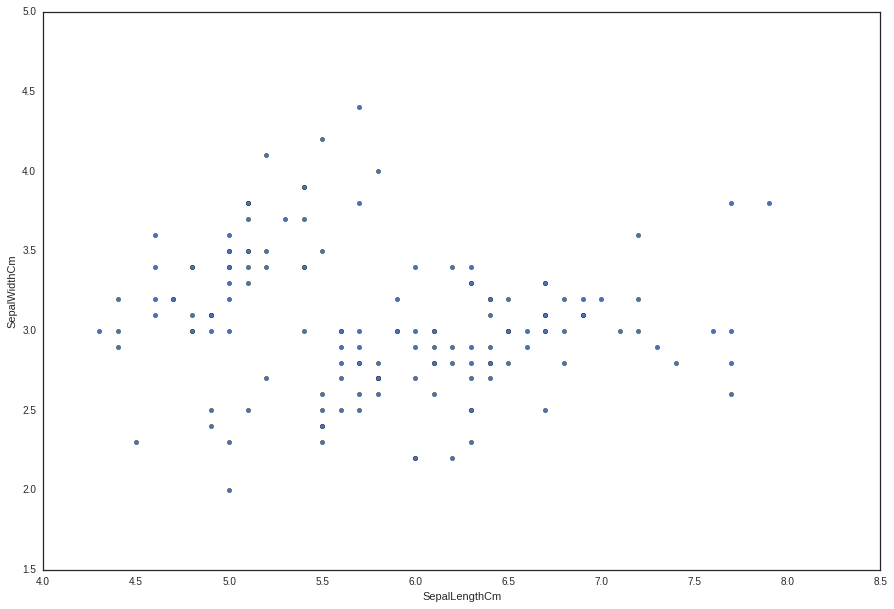

In [35]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

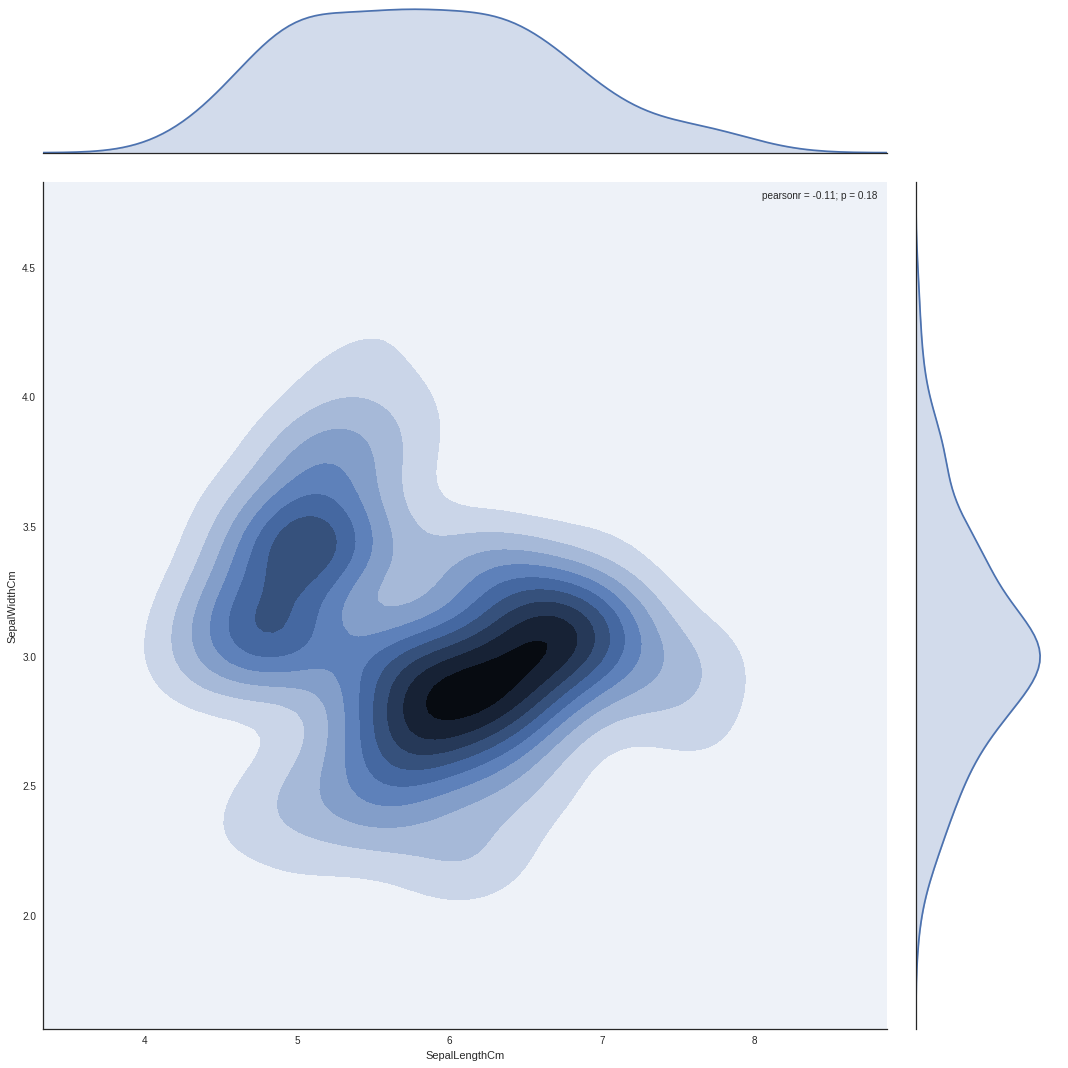

In [36]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=15, kind="kde")

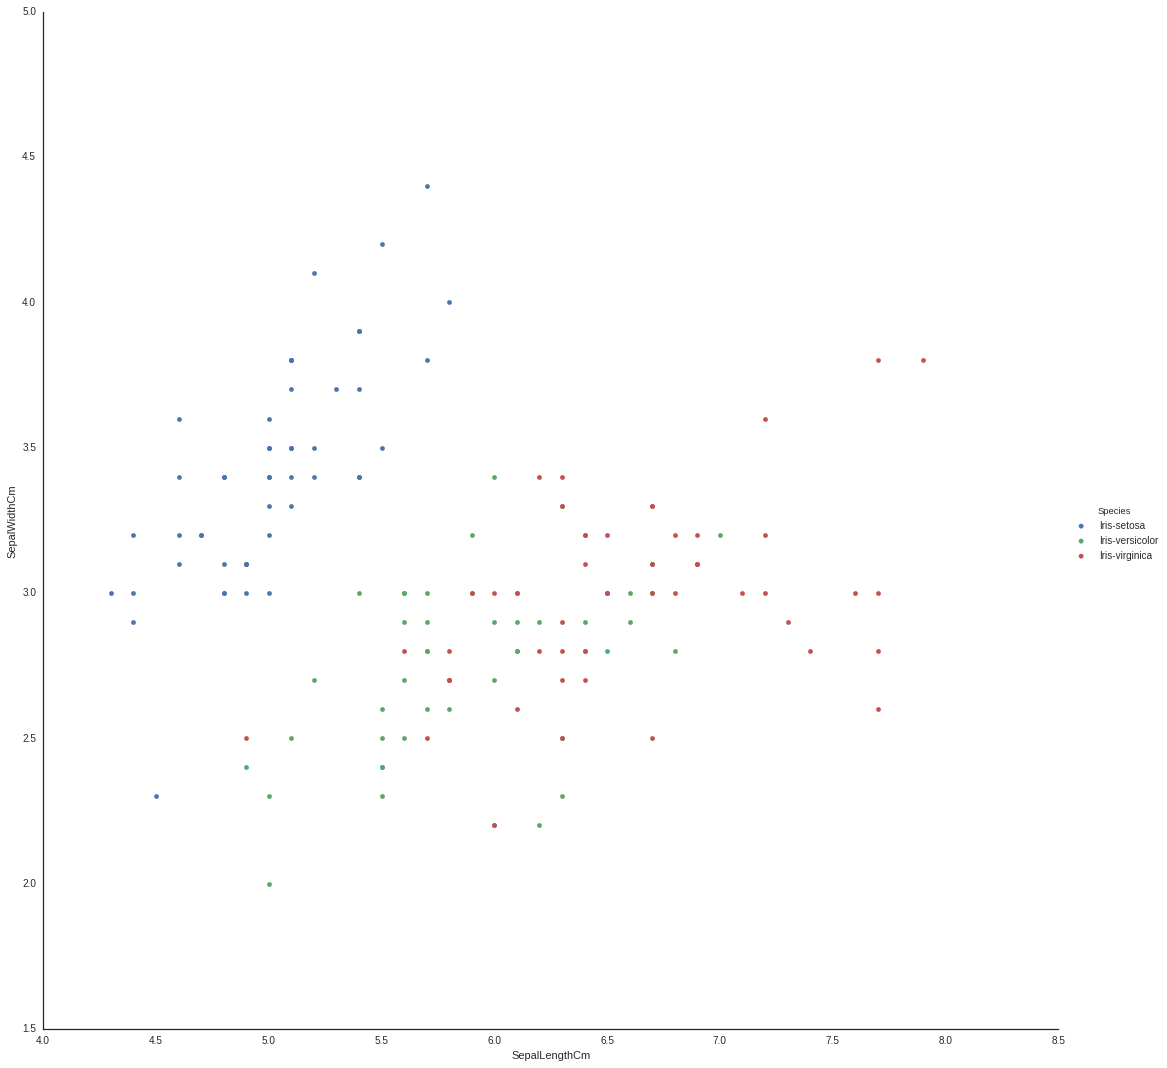

In [37]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=15) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

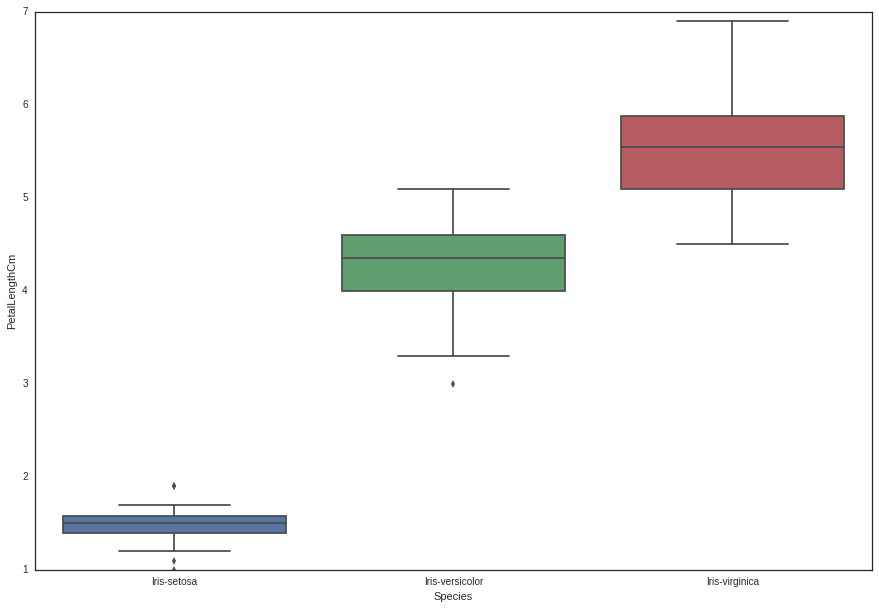

In [38]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

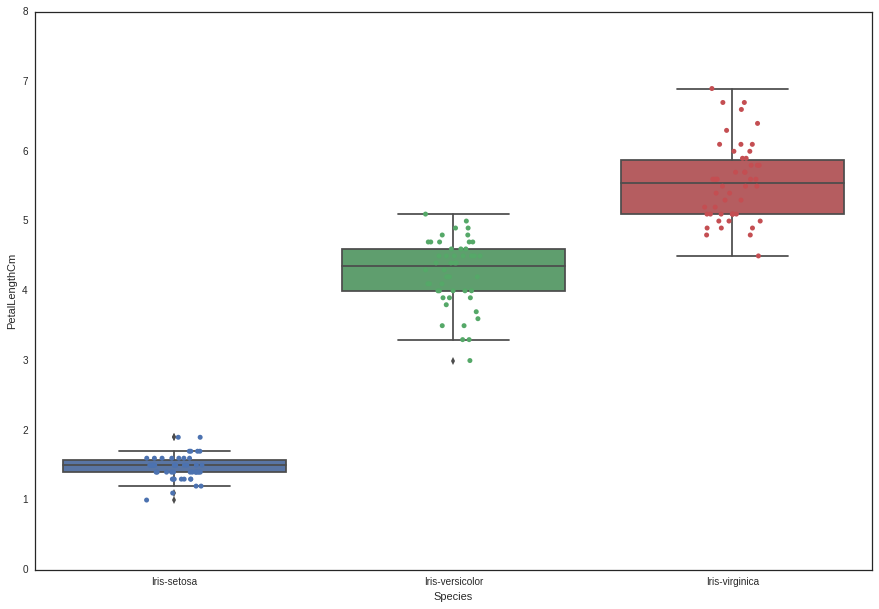

In [39]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

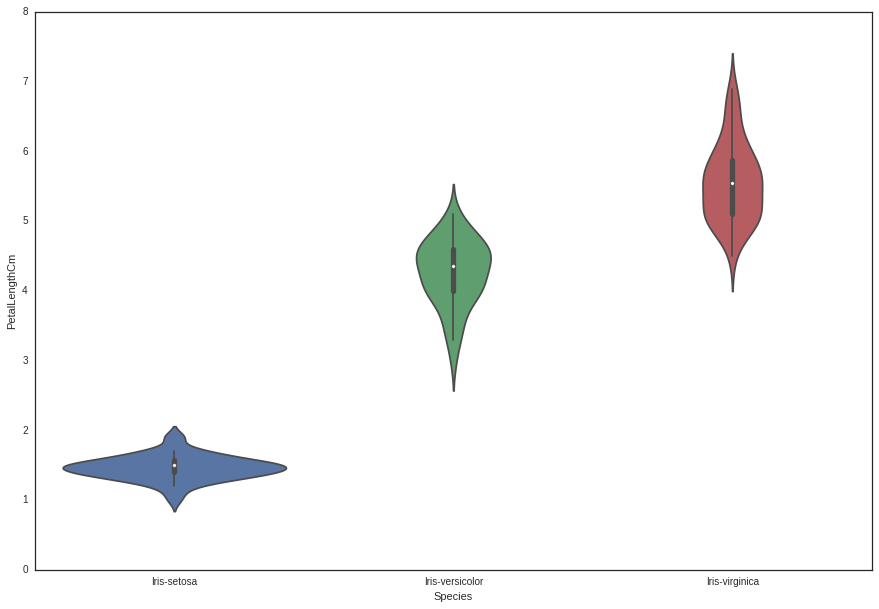

In [40]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=9)

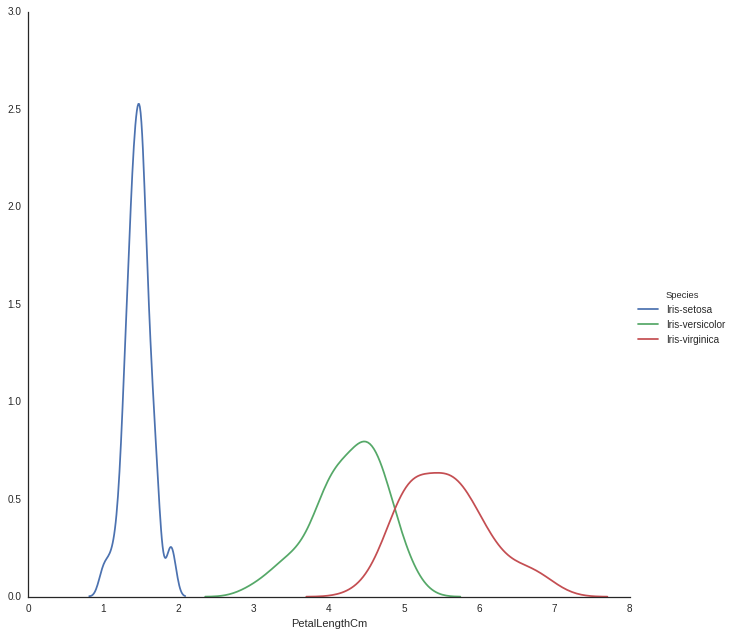

In [41]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", size=9) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

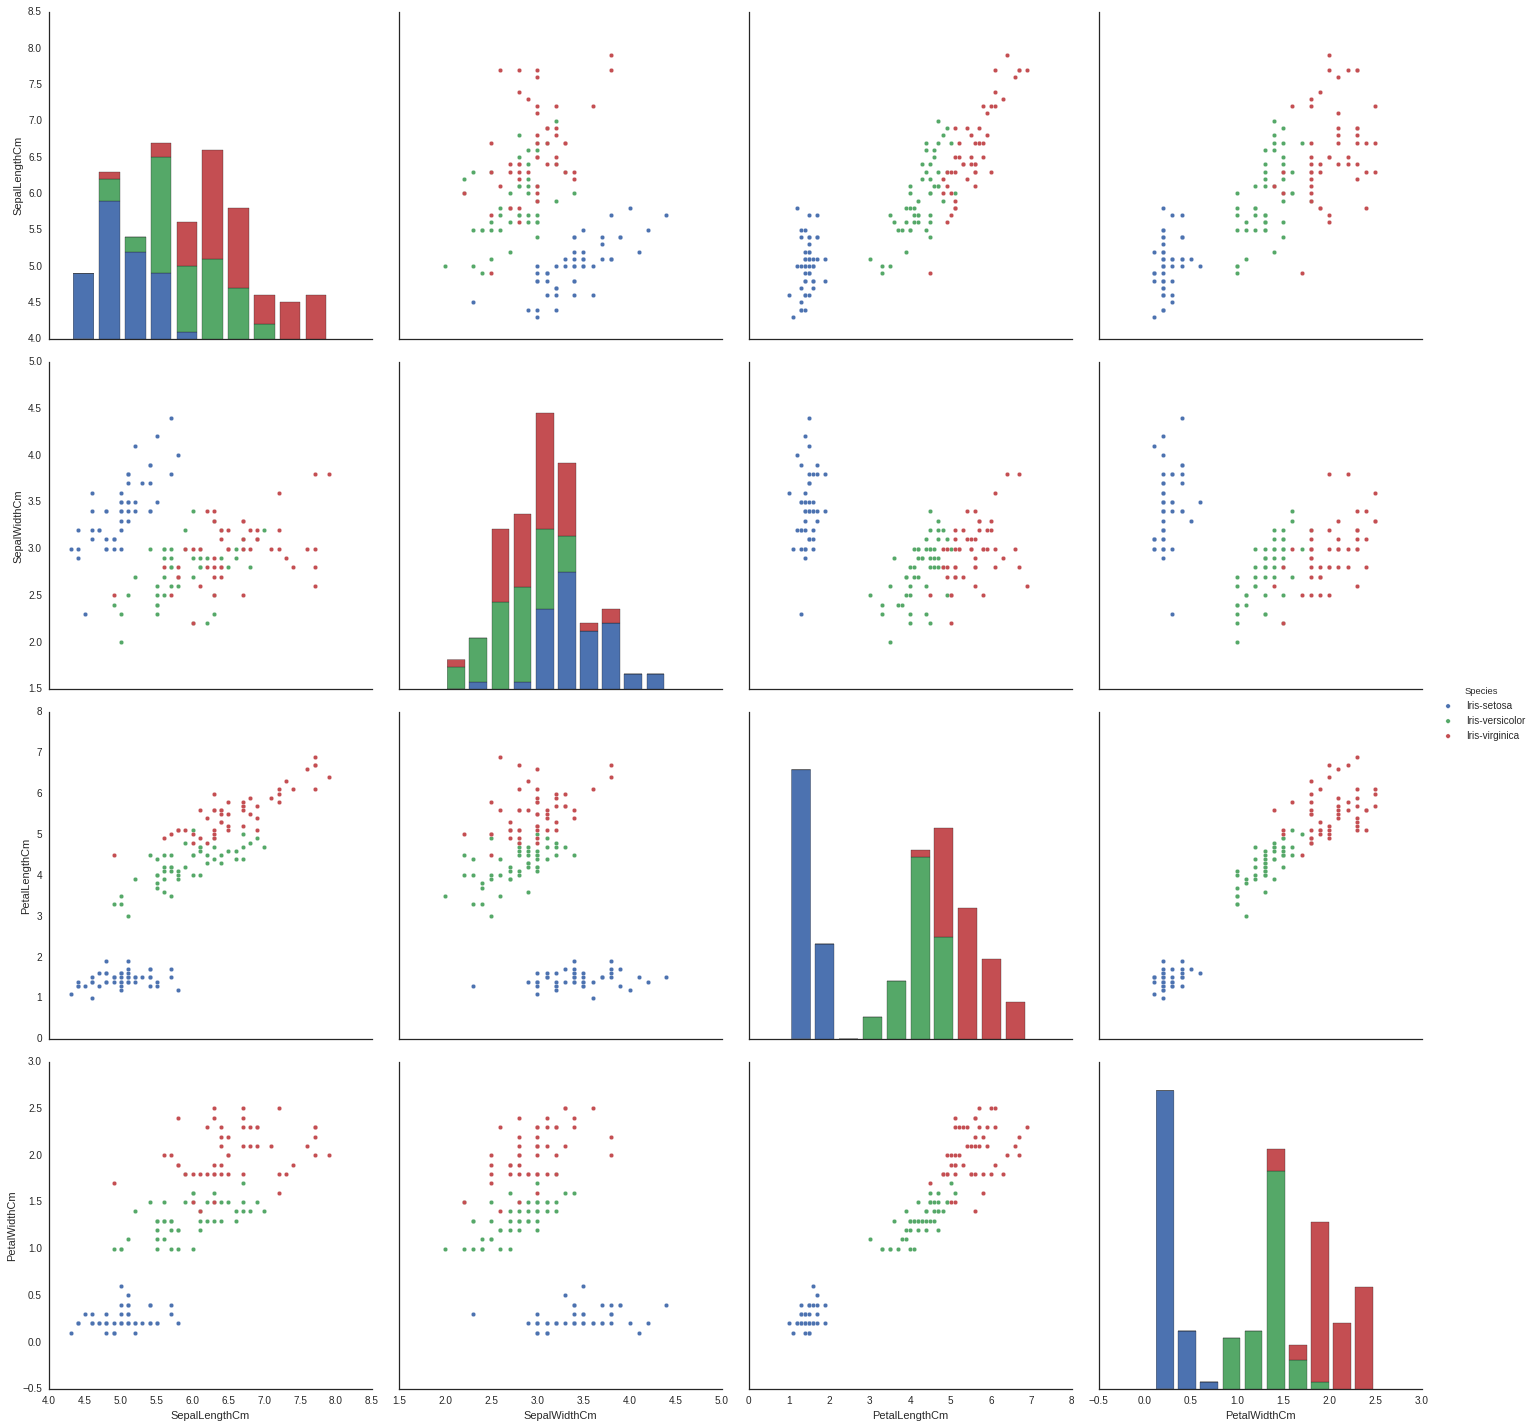

In [42]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris, hue="Species", size=5, diag_kind="hist")

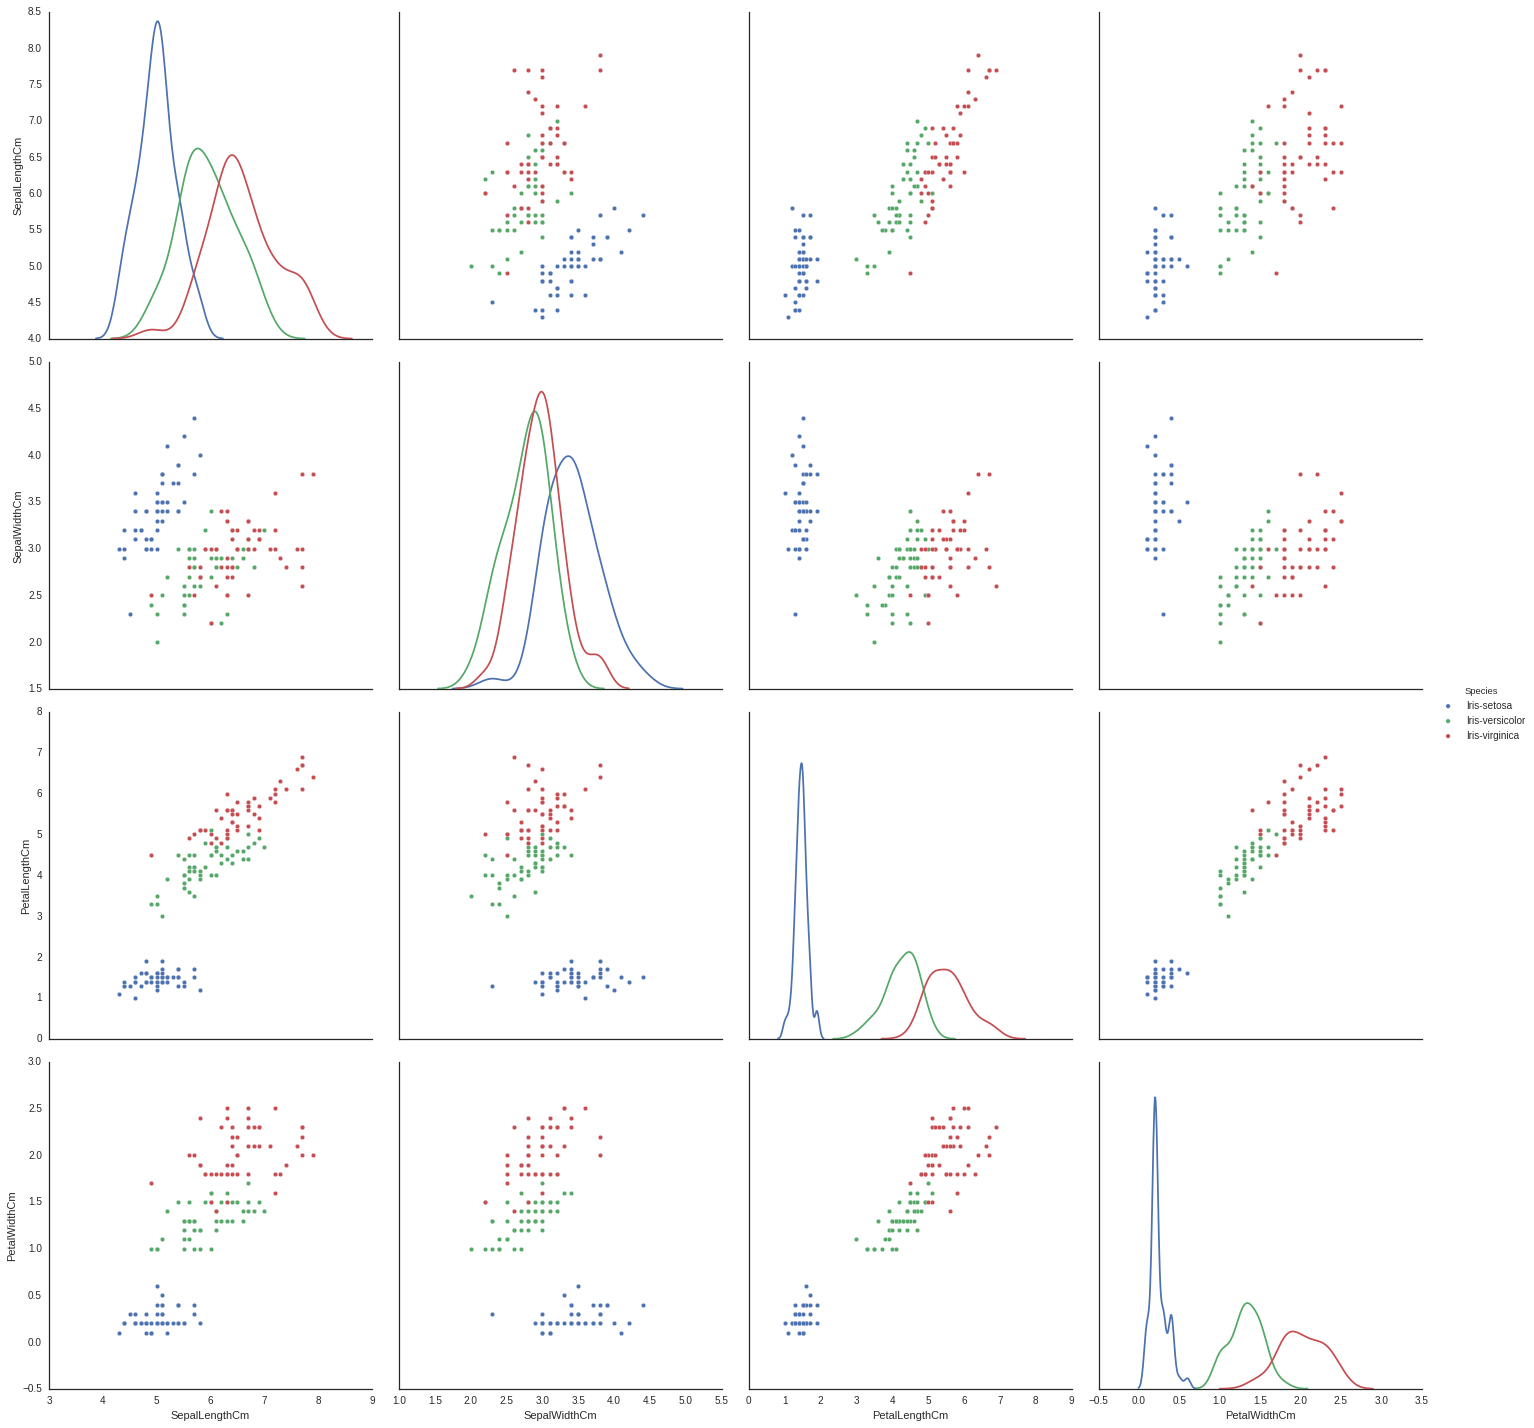

In [43]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris, hue="Species", size=5, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02dbbf36d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f02dba45898>]], dtype=object)

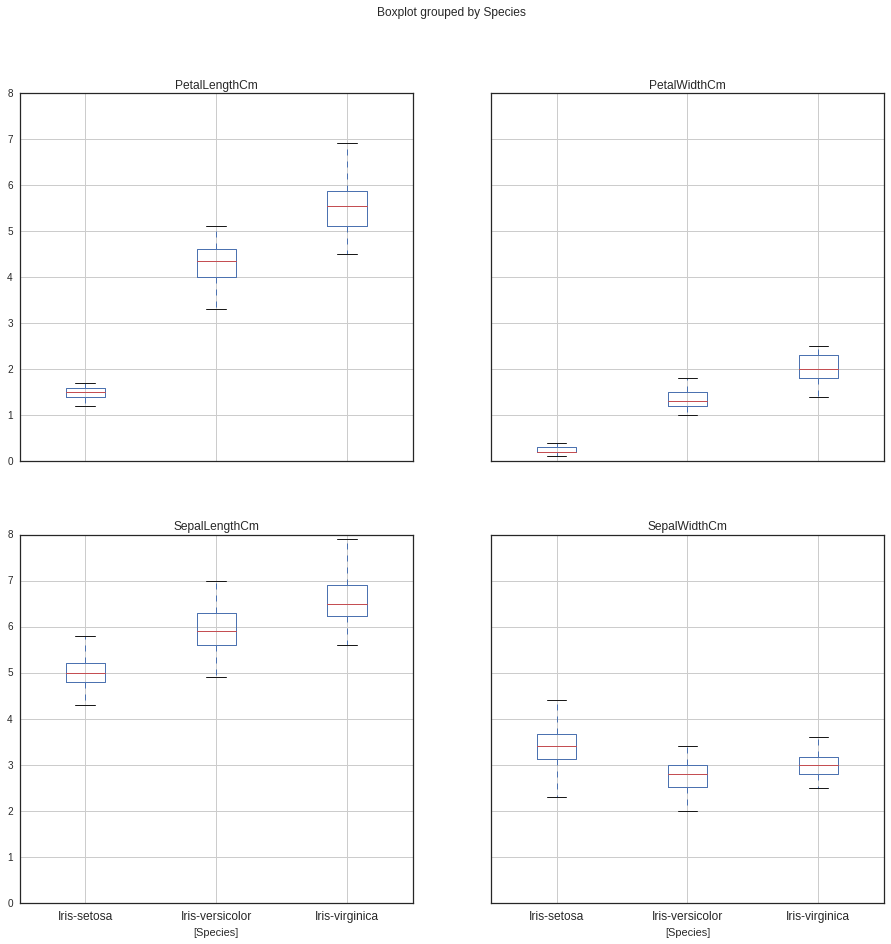

In [44]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.boxplot(by="Species", figsize=(15, 15))

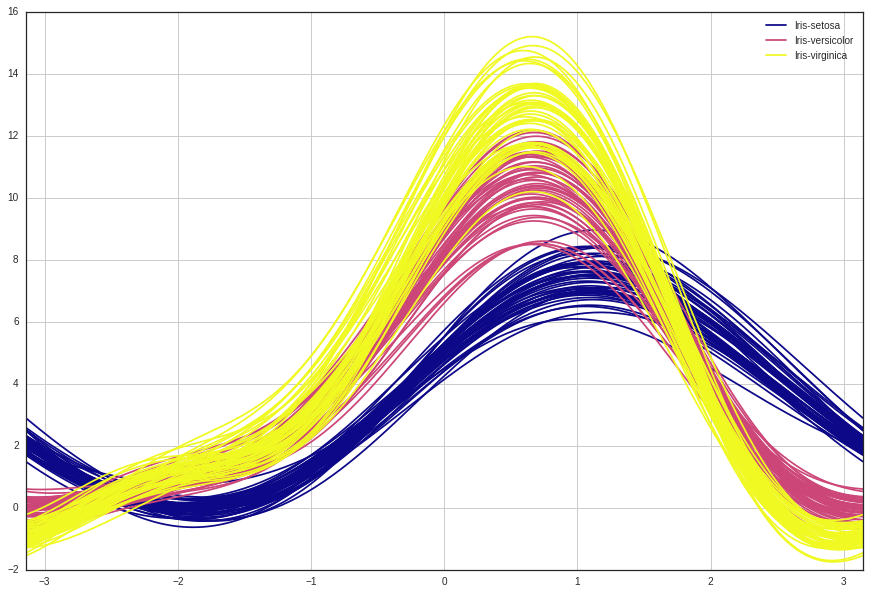

In [45]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(iris, "Species",colormap="plasma")

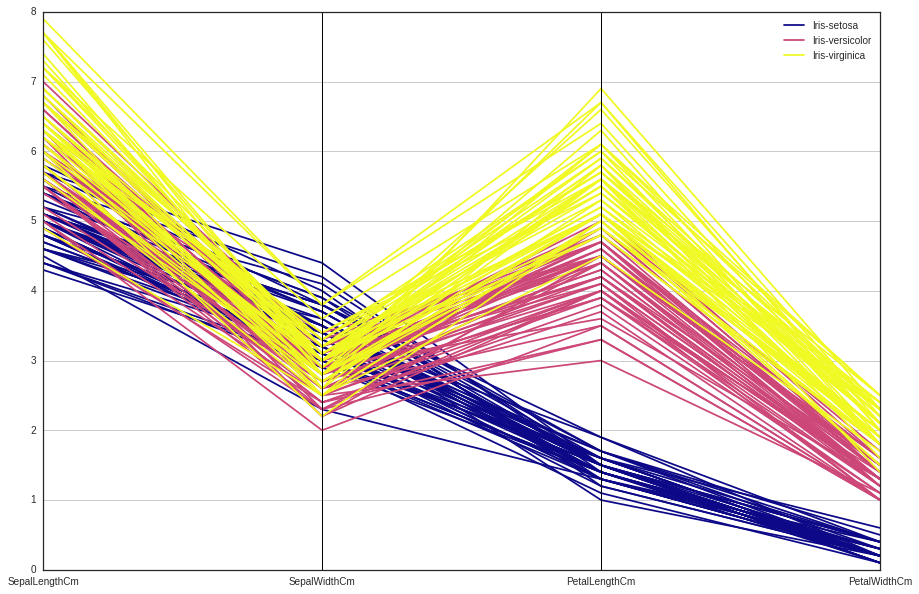

In [46]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris, "Species",colormap="plasma")

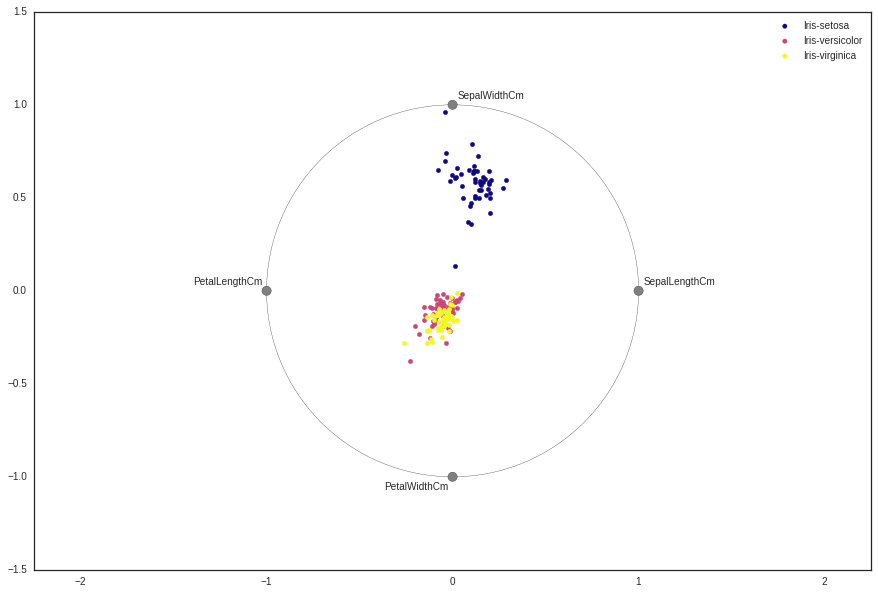

In [47]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris, "Species",colormap="plasma")

# Wrapping Up

I hope you enjoyed this quick introduction to some of the quick, simple data visualizations you can create with pandas, seaborn, and matplotlib in Python!

